<p style="text-align:center;">
<img src="https://github.com/digital-futures-academy/DataScienceMasterResources/blob/main/Resources/datascience-notebook-header.png?raw=true"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>

# Swan Consulting Exploratory Data Analysis
### <i>By Team Ugly Ducklings</i>

### Table Of Contents:
* [General Properties](#1)
* [Data Cleaning](#2)
* [Exploratory Data Analysis](#3)

The aim of this workbook is to perform Exploratory Data Analysis on the Swan Consulting Churn Dataset.

In [2]:
## Imports
## Importing the big 4 - Pandas, Numpy, Seaborn & matplotlib
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
## Import the metrics we'll be using
from sklearn import metrics
## Import Logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression

# General Properties <a class="anchor" id="1"></a>

In [180]:
## Read the dataframe
df = pd.read_csv("swan_data.csv")

In [182]:
pd.options.display.max_columns = None

In [184]:
# check shape
df.shape

(7043, 31)

In [186]:
# check columns
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [188]:
# check 5 rows of data
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [190]:
# check last 5 rows of data
df.tail()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,0,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,NaN
7042,3186-AJIEK,1,United States,California,Apple Valley,92308,"34.424926, -117.184503",34.424926,-117.184503,Male,No,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No,0,NaN


In [192]:
# check data types
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

# Data Cleaning <a class="anchor" id="2"></a>

'Total Charges' is has an object data type. In order to do EDA later, convert to numeric datatype. There seem to be entries that are not nulls but are just spaces. These have a tenure of 0 months, likely meaning no payment has been made yet. Convert these to a value of 0.

In [196]:
# https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html
# change total charges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# 
df['Total Charges'].fillna(value = 0, method = None, inplace=True)

In [198]:
# check null values
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

> <b>Insights:</b>\
    * The dataset has nulls in only one column.\
    * The 'Churn Reason' column does not require a churn reason if the customer hasn't churned, so this is not an issue.

In [201]:
# check for duplicated rows
sum(df.duplicated())

0

> <b>Insights:</b>\
    * There are no duplicated rows.

In [204]:
# check number of unique entries
df.nunique()

CustomerID           7043
Count                   1
Country                 1
State                   1
City                 1129
Zip Code             1652
Lat Long             1652
Latitude             1652
Longitude            1651
Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Label             2
Churn Value             2
Churn Reason           20
dtype: int64

> <b>Insights:</b>\
    * All customers are in California, USA.\
    * Where there are three unique values, the options are typically 'Yes', 'No', 'No internet service'.\
    * Internet Service is another column in the dataframe.

# EDA <a class="anchor" id="3"></a>

In [208]:
# dataframe with those that churned
churned = df[df['Churn Value'] == 1]

In [210]:
# find percentage of customers that churned
(churned.shape[0] / df.shape[0])*100

26.536987079369588

> <b>Insights:</b>\
    * 26.5% of customers in this dataset have churned.\
    * There are more customers that have not churned than have churned. This might need to be balanced for predictive modelling.

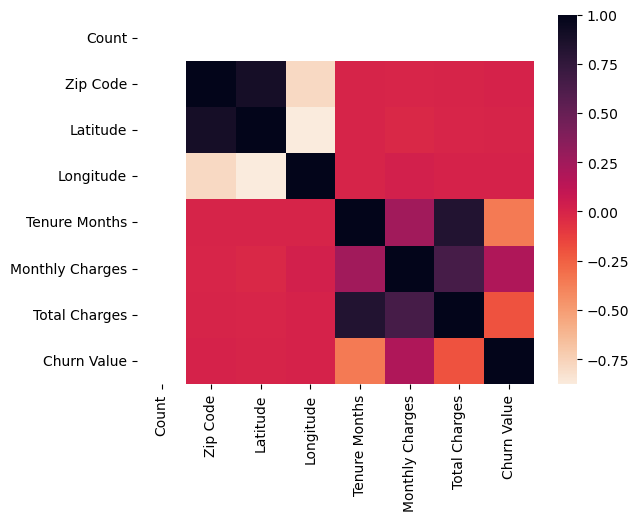

In [213]:
# produce a correlation heatmap
matrix = df.corr(numeric_only=True)
sns.heatmap(matrix,
            cmap = 'rocket_r')
plt.show()

> <b>Insights:</b>\
    * There is a strong correlation between longitude, latitude, and zip code.\
    * There is a correlation between tenure months and monthly charges, and monthly charges and total charges.

To investigate the correlations further, a pairplot was used.

C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

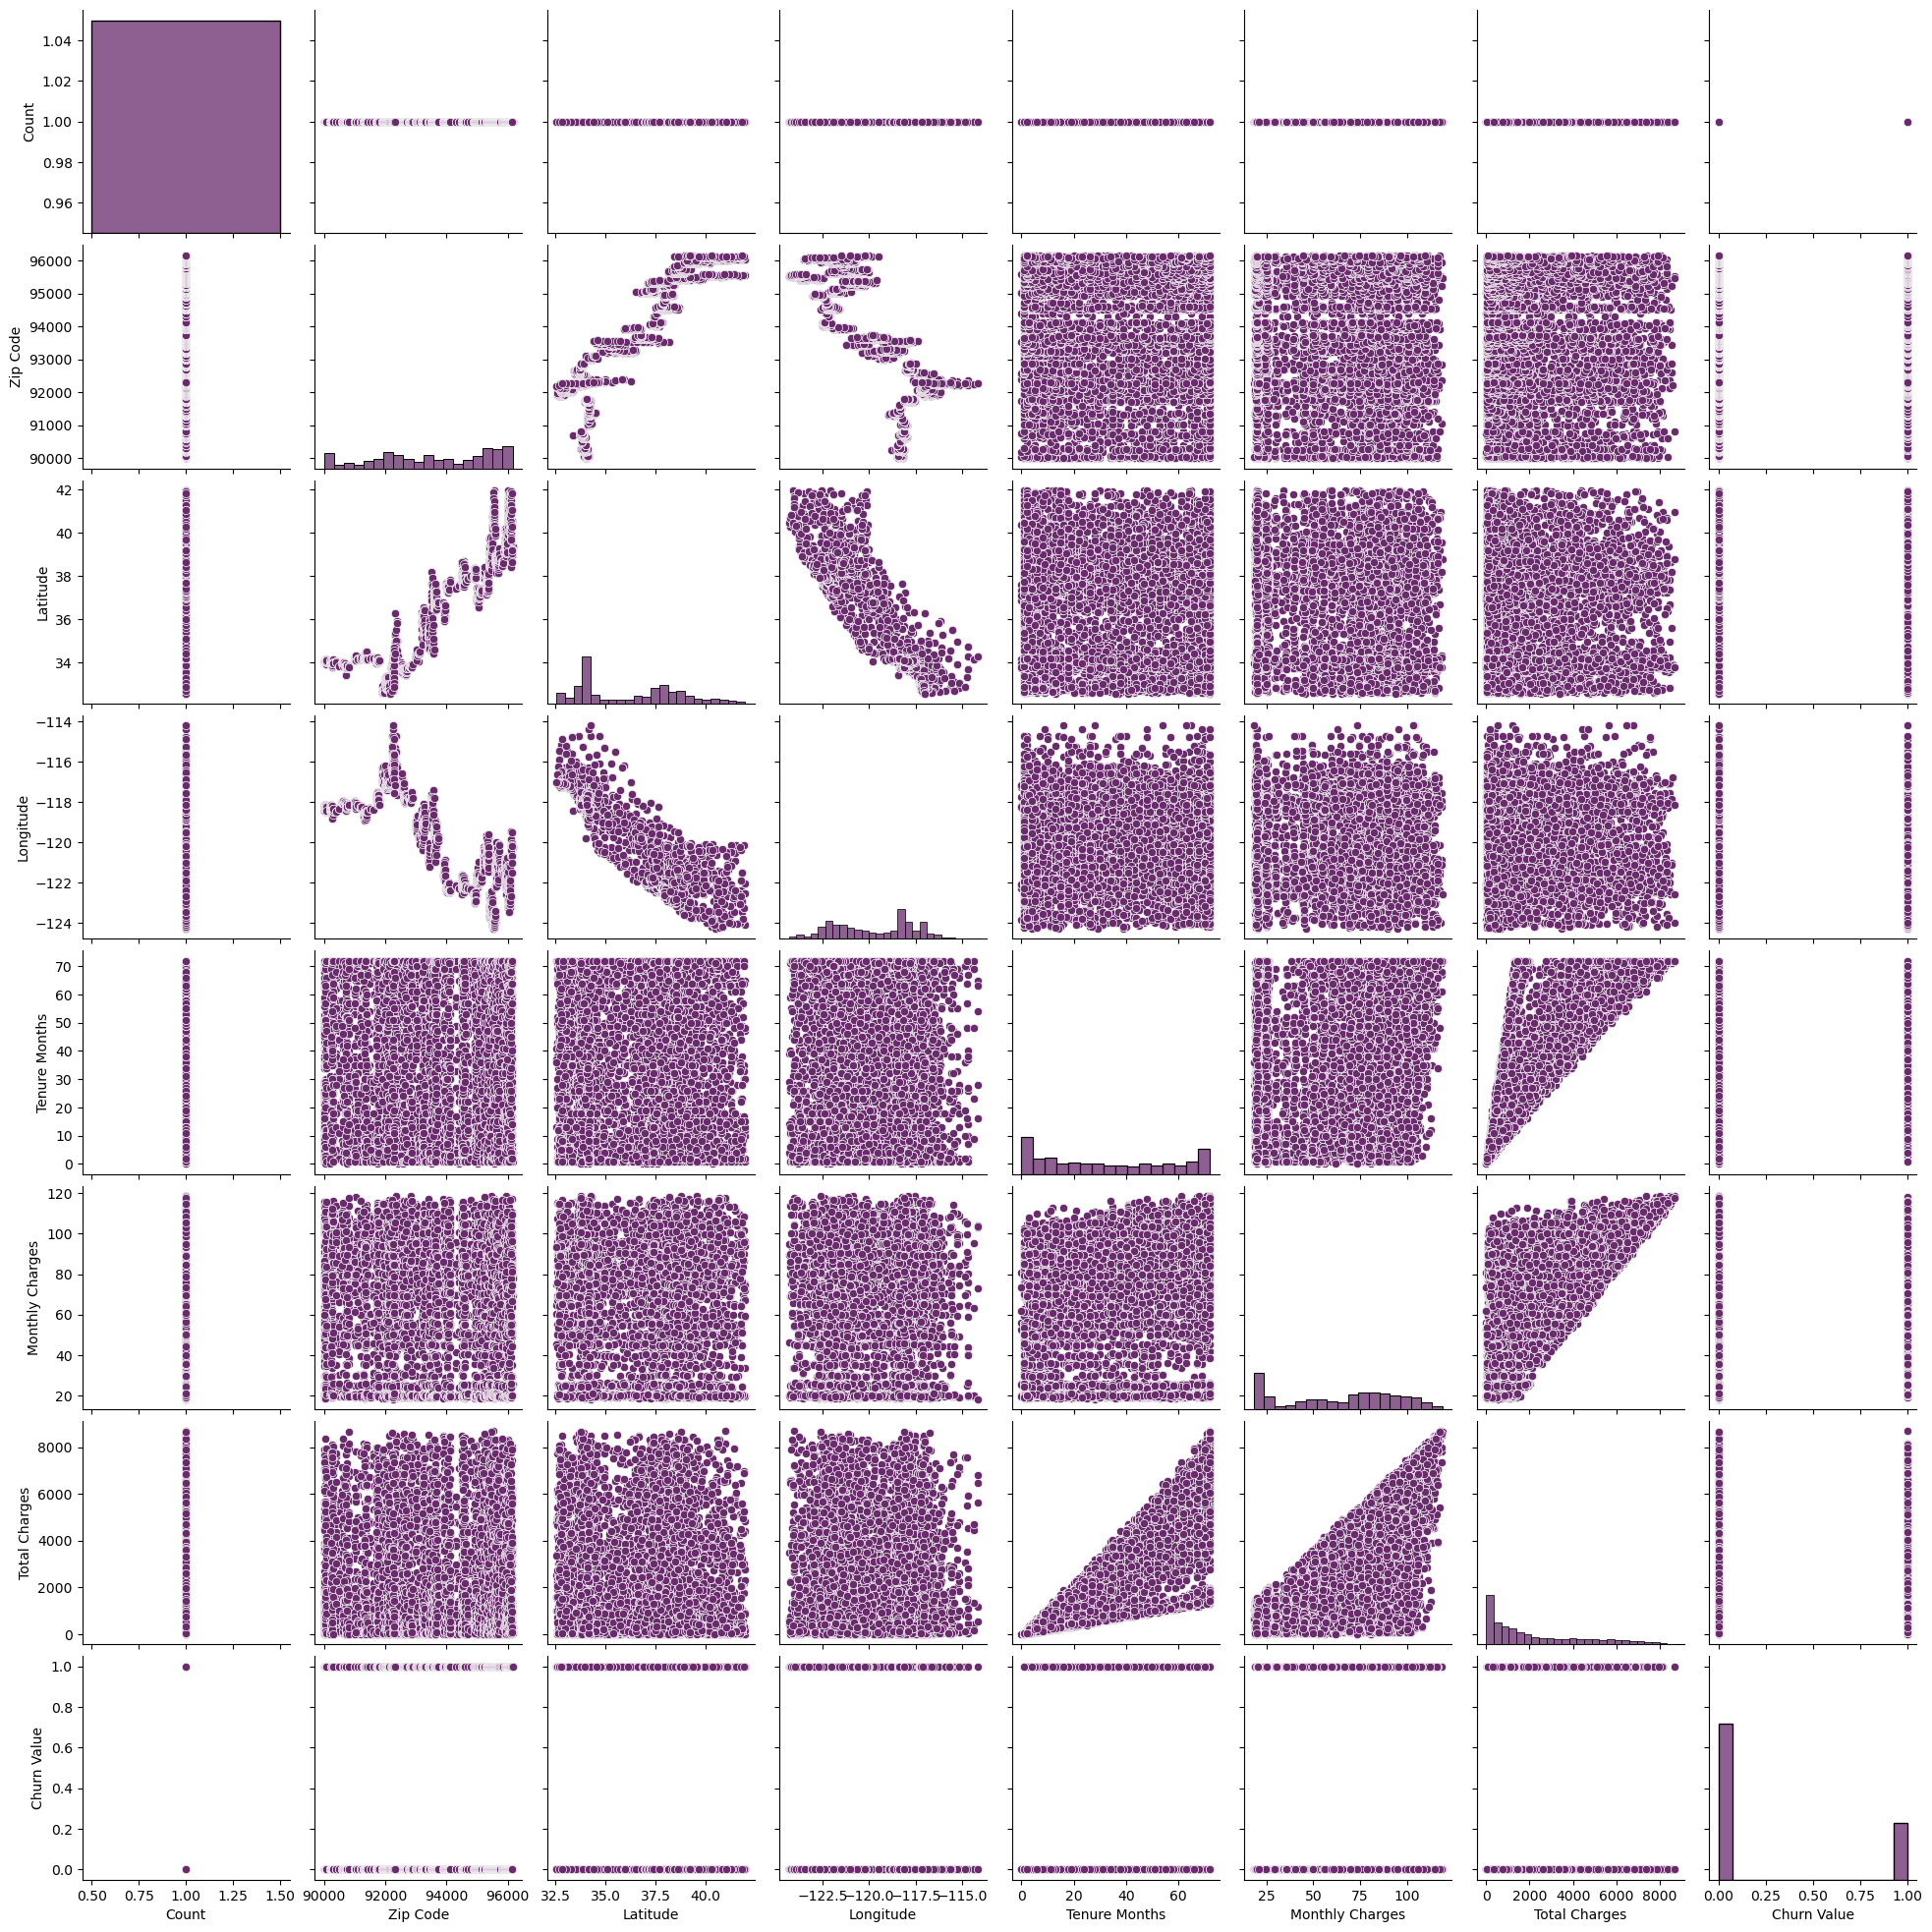

In [217]:
# produce a pairplot
sns.pairplot(data=df, plot_kws={'color': '#692b6c'}, diag_kws={'color': '#692b6c'})
plt.show()

As churn value is binary, correlation graphs are less useful in determining the reason for churning. Below are countplots to help determine the reason for churning.

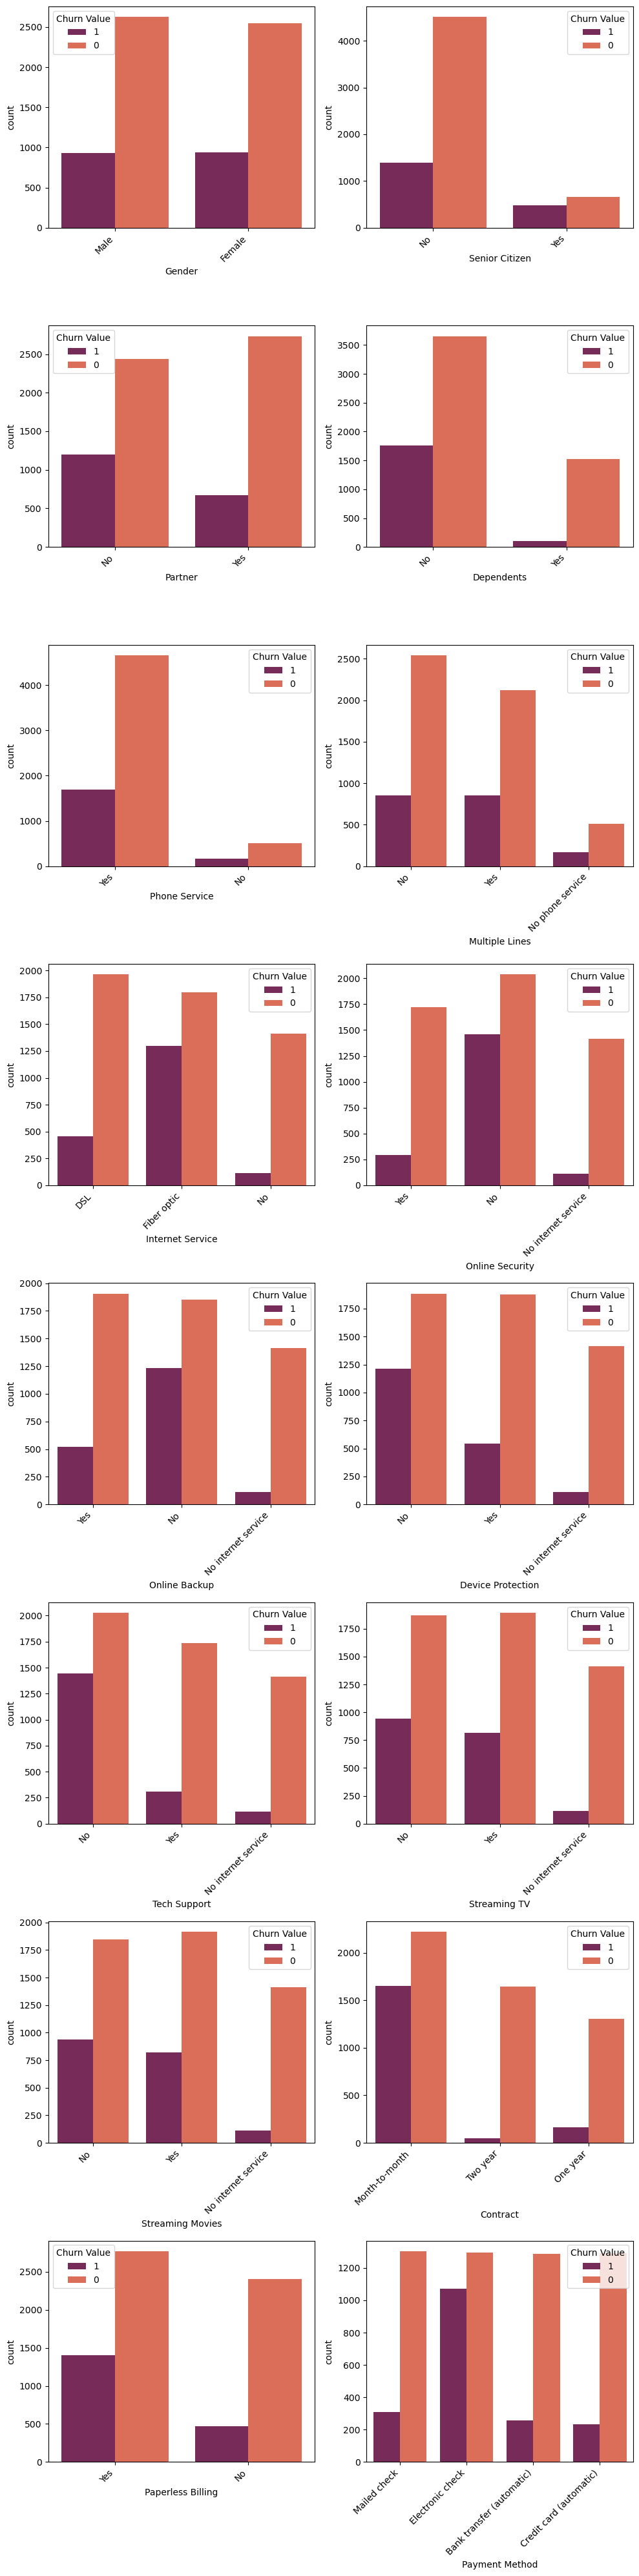

In [220]:
# produce countplots

# columns we are interested in
dis_columns = ['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 #'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 #'Monthly Charges'
              ]

# plot figures
plt.figure(figsize=(10, 40))
i = 0

for col in dis_columns:
    i += 1
    plt.subplot(8, 2, i)
    
    sns.countplot(data = df, 
                x = col,
                #common_norm=True,
                hue = df['Churn Value'].astype(str),
                palette='rocket')
    
    plt.xticks(rotation = 45,
               ha = 'right')
    
plt.tight_layout()
plt.show()

> <b>Insights:</b>\
 Customers may be more likely to churn if they:\
        * Are not a senior citizen\
        * Have no partner and no dependents\
        * Have phone service\
        * Have fibre optic internet service\
        * Have no online backup, device protection, or tech support\
        * Are on a month-to-month contract\
        * Use paperless billing\
        * Pay via electronic check

C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sumye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


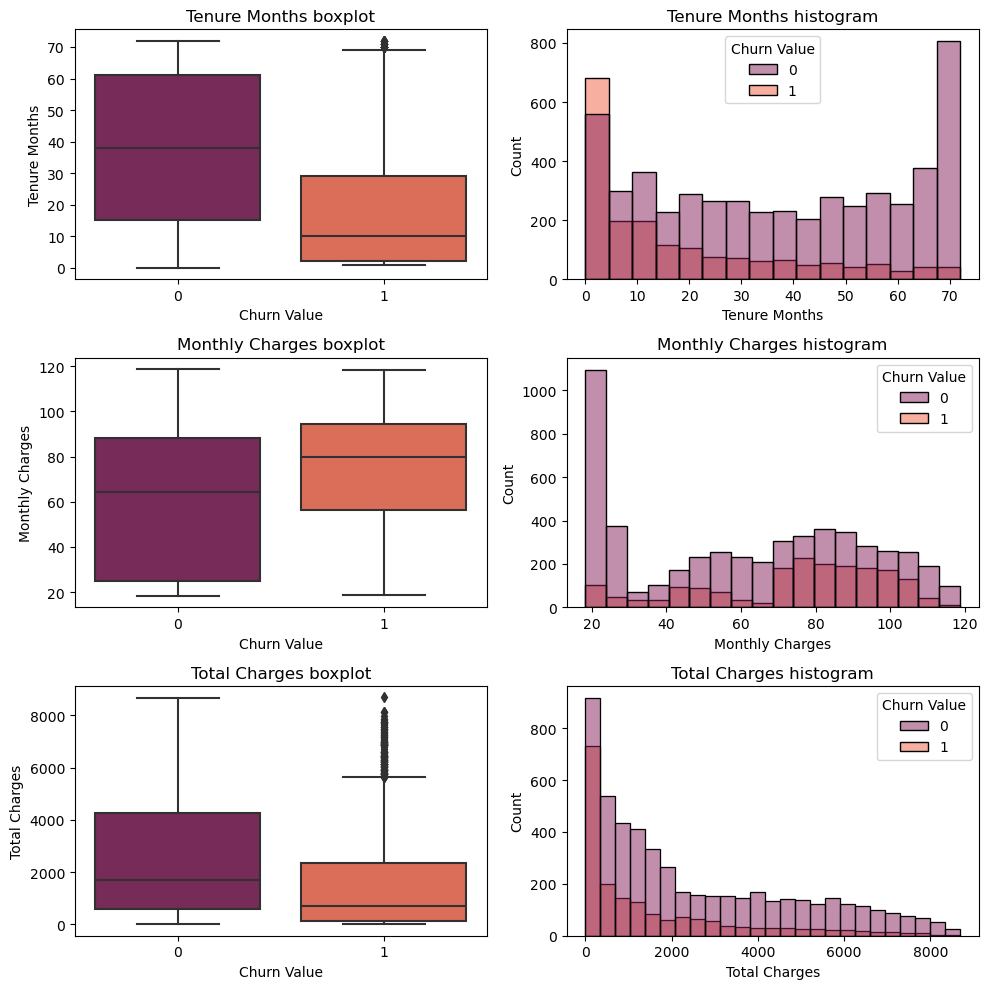

In [223]:
# produce boxplots and histograms

# code adapted from https://www.kaggle.com/code/philbowman212/life-expectancy-exploratory-data-analysis with help from
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

# create a list of columns we are interested in
cont_vars = ['Tenure Months', 'Monthly Charges', 'Total Charges']

def outliers_visual(data):
    plt.figure(figsize=(10, 10))
    i = 0
    
    # for each column in the list
    for col in cont_vars:
        
        # graph number starts at 1
        i += 1
        # 9 rows, 4 columns, graph number i
        plt.subplot(3, 2, i)
        # create a boxplot with developed and developing countries shown in different colours for each column in the list
        sns.boxplot(x='Churn Value', y=col, data=data, palette='rocket')
        plt.title('{} boxplot'.format(col))
        
        # graph number increases
        i += 1
        # 9 rows, 4 columns, graph number i
        plt.subplot(3, 2, i)
        # create a histogram with developed and developing countries shown in different colours for each column in the list
        sns.histplot(data=data, x=col, hue='Churn Value', palette='rocket')
        plt.title('{} histogram'.format(col))
    
    # adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

    
outliers_visual(df)

> <b>Insights:</b>\
    * The boxplot for those that churn indicate typically higher monthly charges.\
    * Churners typically churn within the first few months. As the time of tenure increases, they are less likely to churn.

In [226]:
# look at unique reasons for churning
reasons = df['Churn Reason'].unique()

# define an empty dictionary to store the reason and the count of times it occurs
reasons_freq = {}

In [228]:
# iterate over column and count the number of times each reason appears
for reason in df['Churn Reason']:
    
    # if reason is already in the dictionary, add 1
    if reason in reasons_freq:
        reasons_freq[reason] += 1
        
    # if it is not in the dictionary, make value equal 1
    else:
        reasons_freq[reason] = 1

# sort dictionary by values in descending order
sorted_reasons_by_freq = sorted(reasons_freq.items(), key=lambda x:x[1], reverse=True)
sorted_reasons_by_freq_dict = dict(sorted_reasons_by_freq)
print(sorted_reasons_by_freq_dict)

{nan: 5174, 'Attitude of support person': 192, 'Competitor offered higher download speeds': 189, 'Competitor offered more data': 162, "Don't know": 154, 'Competitor made better offer': 140, 'Attitude of service provider': 135, 'Competitor had better devices': 130, 'Network reliability': 103, 'Product dissatisfaction': 102, 'Price too high': 98, 'Service dissatisfaction': 89, 'Lack of self-service on Website': 88, 'Extra data charges': 57, 'Moved': 53, 'Limited range of services': 44, 'Lack of affordable download/upload speed': 44, 'Long distance charges': 44, 'Poor expertise of phone support': 20, 'Poor expertise of online support': 19, 'Deceased': 6}


> <b>Insights:</b>\
The top three reasons for leaving include:\
    * Attitude of support person\
    * Competitor offered higher download speeds\
    * Competitor offered more data